In [51]:
%pylab inline
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [44]:
df_train_variant = pd.read_csv("training_variants").set_index("ID")
df_train_text = pd.read_csv("training_text", delimiter = "\|\|", skiprows=1, names=['ID', 'Text']).set_index('ID')

df_test_variant = pd.read_csv("test_variants").set_index("ID")
df_test_text = pd.read_csv("test_text", delimiter = "\|\|", skiprows = 1, names=["ID", "Text"]).set_index("ID")

C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app
C:\Users\Wignand\Miniconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [46]:
df_train = pd.concat([df_train_variant, df_train_text ], axis=1)
df_test = pd.concat([df_test_variant, df_test_text], axis=1)

In [47]:
display(df_train.head())
display(df_test.head())

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


,Gene,Variation,Text
ID,,,
0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [48]:
print(df_train["Gene"].value_counts()[:10])
print(df_train["Class"].value_counts())

print(df_test["Gene"].value_counts()[:10])

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64
F8      134
CFTR     57
F9       54
G6PD     46
GBA      39
AR       38
PAH      38
CASR     37
ARSA     30
VWF      29
Name: Gene, dtype: int64


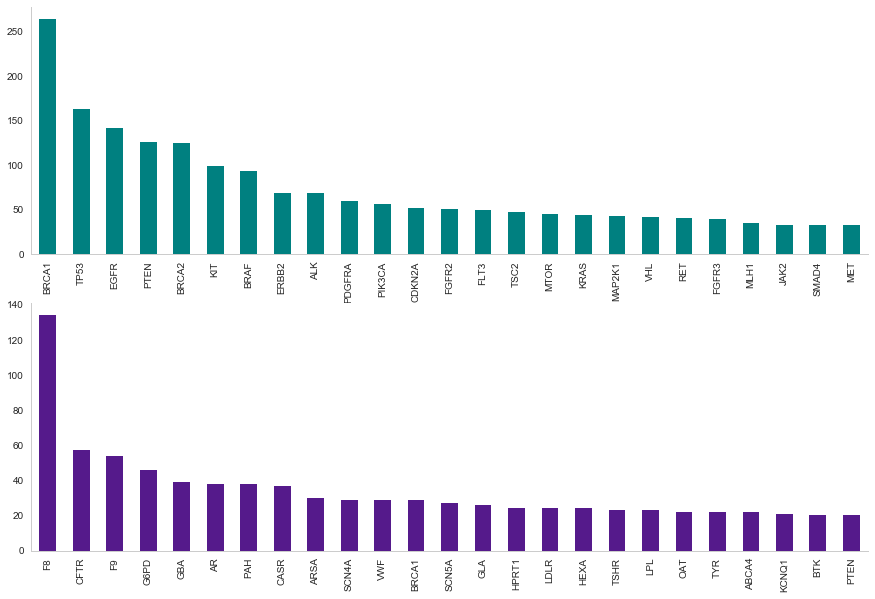

In [113]:
most_common_train = df_train["Gene"].value_counts()[:25] 
most_common_genes = most_common_train.index
df_train_most_common = df_train[df_train["Gene"].isin(most_common_genes)]
df_train_most_common_counts = df_train_most_common["Gene"].value_counts()

most_common_test = df_test["Gene"].value_counts()[:25] 
most_common_genes = most_common_test.index
df_test_most_common = df_test[df_test["Gene"].isin(most_common_genes)]
df_test_most_common_counts = df_test_most_common["Gene"].value_counts()

plt.figure(figsize=(15,10))
ax = plt.subplot(211)
df_train_most_common_counts.plot("bar", color="teal")
plt.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax = plt.subplot(212)
df_test_most_common_counts.plot("bar", color="#551a8b")
plt.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
